In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Yulu.csv',parse_dates=[0])

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **Exploratory data analysis**

In [ ]:
df.shape

(10886, 12)

In [ ]:
  # getting datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
#value mapping

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].replace(season_mapping)

holiday_mapping = {1: 'Yes', 0: 'No'}
df['holiday'] = df['holiday'].replace(holiday_mapping)

weather_mapping = {1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'}
df['weather'] = df['weather'].replace(weather_mapping)

workingday_mapping = {1: 'Yes', 0: 'No'}
df['workingday'] = df['workingday'].replace(holiday_mapping)

In [ ]:
# Extract hour from the Request timestamp
df["date_hour"] = df["datetime"].dt.hour

In [ ]:
#assigning timeslot values

def timeslot(x):
  if x<=4:
      return "Dawn"
  elif x <= 9:
      return "Early Morning"
  elif x<=16:
      return "Noon"
  elif x<=21:
      return "Late Evening"
  else:
      return "Night"

df["TimeSlot"] = df["date_hour"].apply(timeslot)

In [ ]:
# Assigning quaterly values over datetime columns
df['datetime'] = pd.to_datetime(df['datetime'])

df['Yearly_Quarters'] = df['datetime'].dt.quarter
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year


In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date_hour,TimeSlot,Yearly_Quarters,month,year
0,2011-01-01 00:00:00,Spring,No,No,clear,9.84,14.395,81,0.0000,3,13,16,0,Dawn,1,1,2011
1,2011-01-01 01:00:00,Spring,No,No,clear,9.02,13.635,80,0.0000,8,32,40,1,Dawn,1,1,2011
2,2011-01-01 02:00:00,Spring,No,No,clear,9.02,13.635,80,0.0000,5,27,32,2,Dawn,1,1,2011
3,2011-01-01 03:00:00,Spring,No,No,clear,9.84,14.395,75,0.0000,3,10,13,3,Dawn,1,1,2011
4,2011-01-01 04:00:00,Spring,No,No,clear,9.84,14.395,75,0.0000,0,1,1,4,Dawn,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,clear,15.58,19.695,50,26.0027,7,329,336,19,Late Evening,4,12,2012
10882,2012-12-19 20:00:00,Winter,No,Yes,clear,14.76,17.425,57,15.0013,10,231,241,20,Late Evening,4,12,2012
10883,2012-12-19 21:00:00,Winter,No,Yes,clear,13.94,15.910,61,15.0013,4,164,168,21,Late Evening,4,12,2012
10884,2012-12-19 22:00:00,Winter,No,Yes,clear,13.94,17.425,61,6.0032,12,117,129,22,Night,4,12,2012


# **Univariate Analysis**

In [ ]:
df['season'].value_counts(normalize=True)*100

Winter    25.114826
Summer    25.105640
Fall      25.105640
Spring    24.673893
Name: season, dtype: float64

In [ ]:
df['weather'].value_counts(normalize=True)*100

clear         66.066507
mist          26.033437
light_rain     7.890869
heavy_rain     0.009186
Name: weather, dtype: float64

In [ ]:
df['workingday'].value_counts(normalize=True)*100

Yes    68.087452
No     31.912548
Name: workingday, dtype: float64

In [ ]:
df['holiday'].value_counts(normalize=True)*100

No     97.14312
Yes     2.85688
Name: holiday, dtype: float64

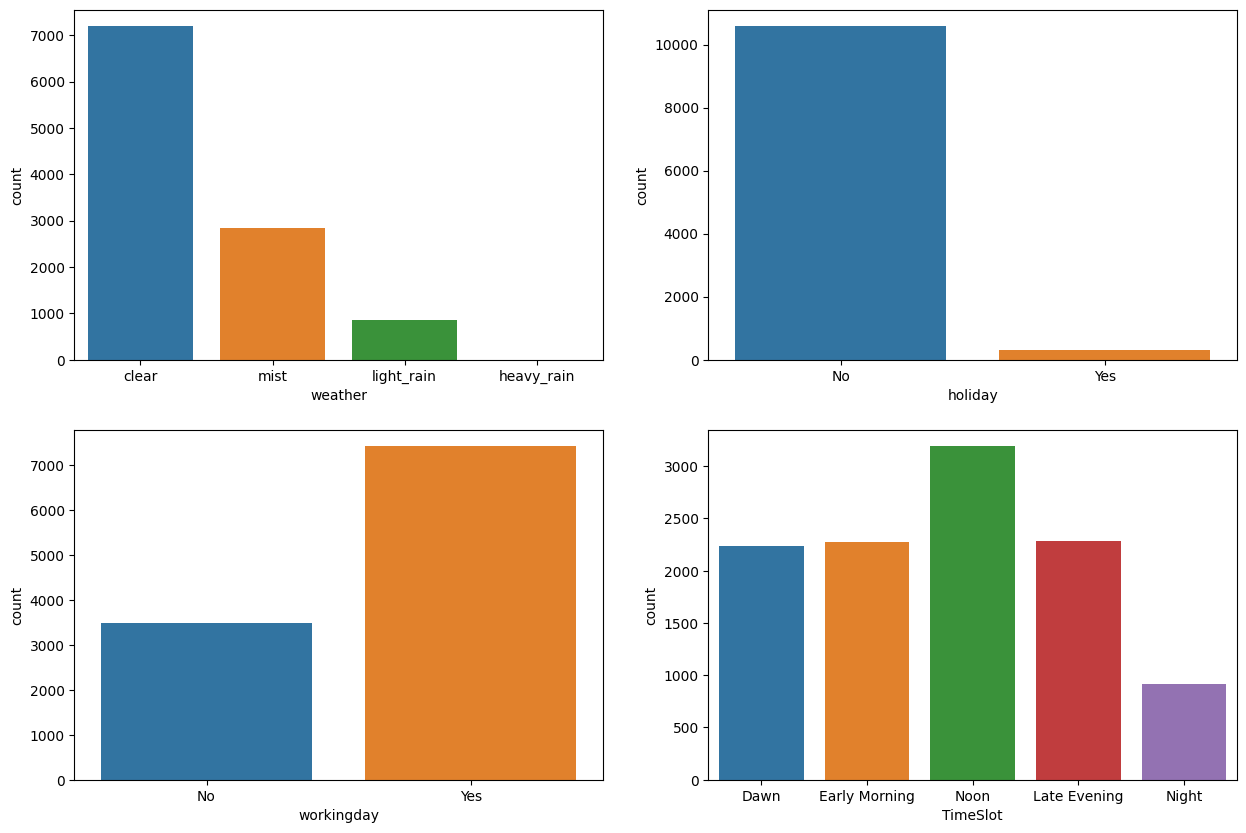

In [ ]:
# Visual Representation wrt multiple parameters

categorical_cols = ['weather', 'holiday','workingday','season']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(data=df, x='weather', ax=axs[0,0])
sns.countplot(data=df, x='holiday', ax=axs[0,1])
sns.countplot(data=df, x='workingday', ax=axs[1,0])
sns.countplot(data=df, x='TimeSlot', ax=axs[1,1])
plt.show()

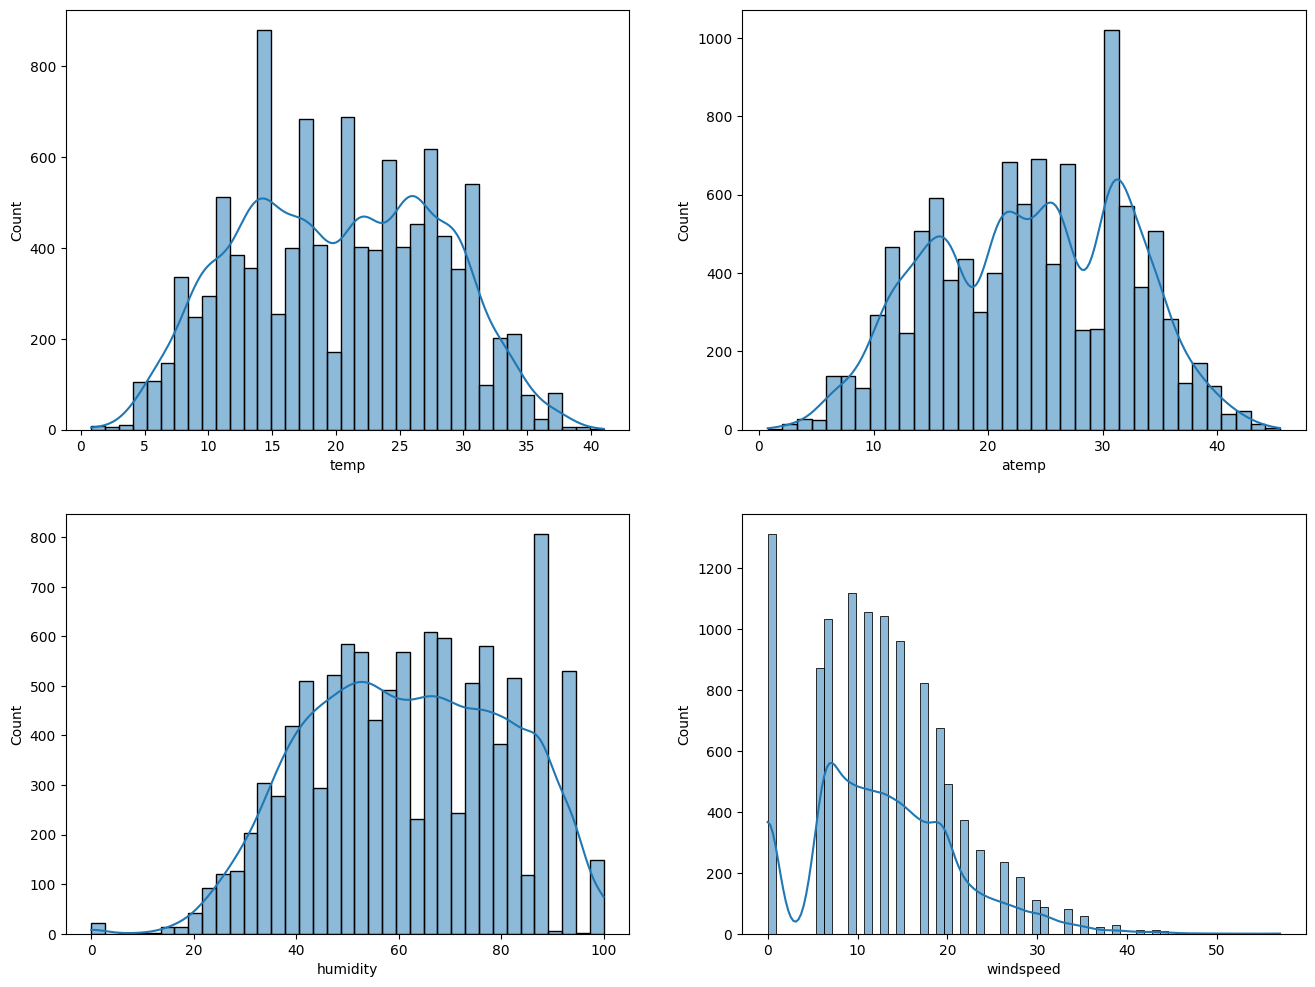

In [ ]:
# Plot for weather conditions

num_cols = ['temp', 'atemp', 'humidity', 'windspeed']

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()


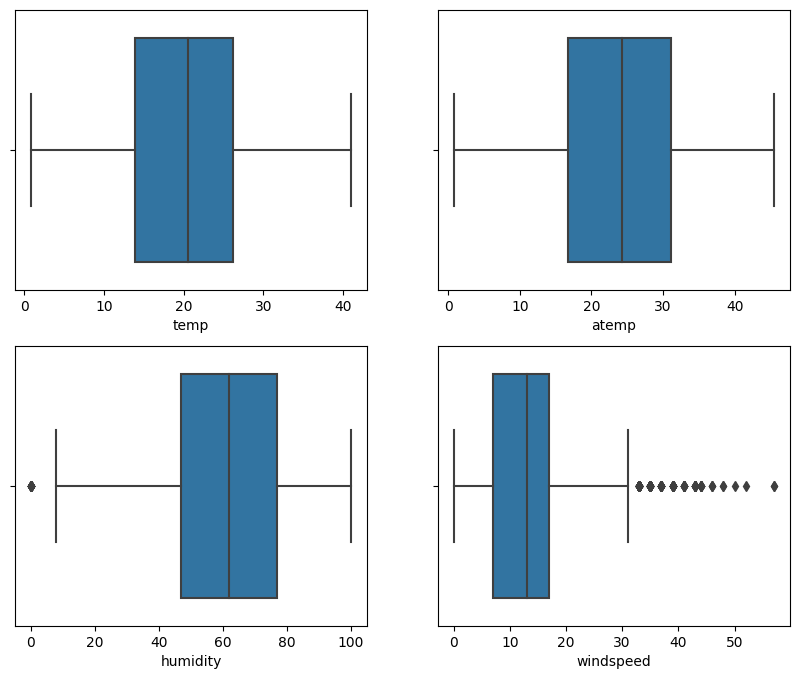

In [ ]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
plt.show()

# **Bivariate Analysis**

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date_hour,TimeSlot,Yearly_Quarters,month,year
0,2011-01-01 00:00:00,Spring,No,No,clear,9.84,14.395,81,0.0000,3,13,16,0,Dawn,1,1,2011
1,2011-01-01 01:00:00,Spring,No,No,clear,9.02,13.635,80,0.0000,8,32,40,1,Dawn,1,1,2011
2,2011-01-01 02:00:00,Spring,No,No,clear,9.02,13.635,80,0.0000,5,27,32,2,Dawn,1,1,2011
3,2011-01-01 03:00:00,Spring,No,No,clear,9.84,14.395,75,0.0000,3,10,13,3,Dawn,1,1,2011
4,2011-01-01 04:00:00,Spring,No,No,clear,9.84,14.395,75,0.0000,0,1,1,4,Dawn,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,clear,15.58,19.695,50,26.0027,7,329,336,19,Late Evening,4,12,2012
10882,2012-12-19 20:00:00,Winter,No,Yes,clear,14.76,17.425,57,15.0013,10,231,241,20,Late Evening,4,12,2012
10883,2012-12-19 21:00:00,Winter,No,Yes,clear,13.94,15.910,61,15.0013,4,164,168,21,Late Evening,4,12,2012
10884,2012-12-19 22:00:00,Winter,No,Yes,clear,13.94,17.425,61,6.0032,12,117,129,22,Night,4,12,2012


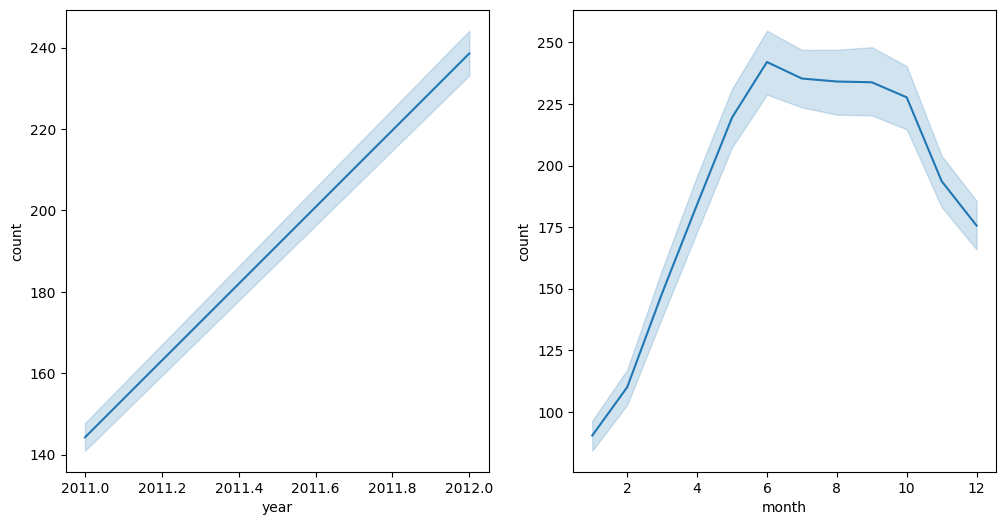

In [ ]:
#analysing graph for years and month

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(x='year', y='count', data=df, ax=axes[0])
sns.lineplot(x='month', y='count', data=df, ax=axes[1])
plt.show()

<Axes: xlabel='atemp', ylabel='temp'>

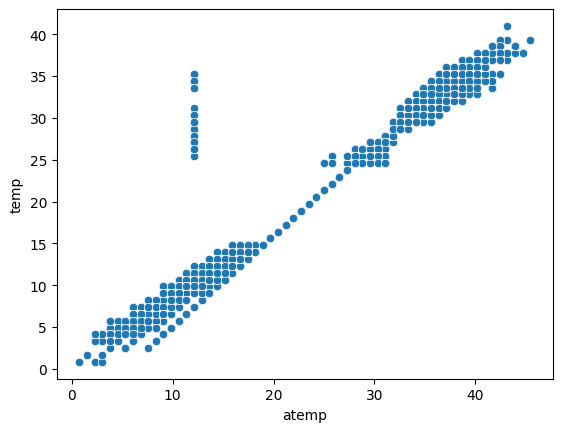

In [ ]:
#Plotting charts for temperature conditions

sns.scatterplot(x='atemp',y='temp',data=df)

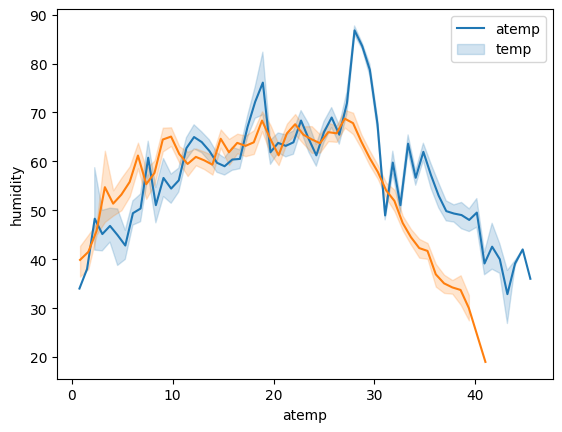

In [ ]:
#Plotting graphs for atemp and temp over humodity

sns.lineplot(x='atemp',y='humidity',data=df)
sns.lineplot(x='temp',y='humidity',data=df)
plt.legend(['atemp','temp'])

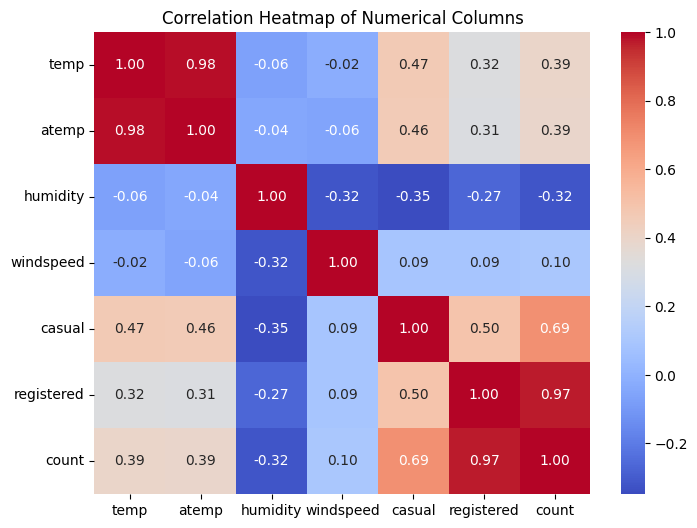

In [ ]:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

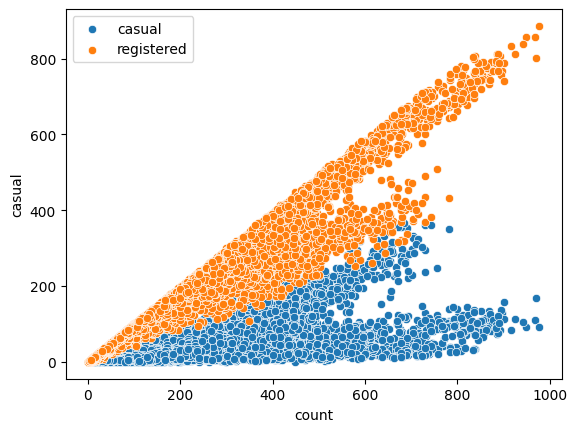

In [ ]:
# Checking the registered and casual users over count
sns.scatterplot(x='count',y='casual',data=df)
sns.scatterplot(x='count',y='registered',data=df)
plt.legend(['casual', 'registered'])

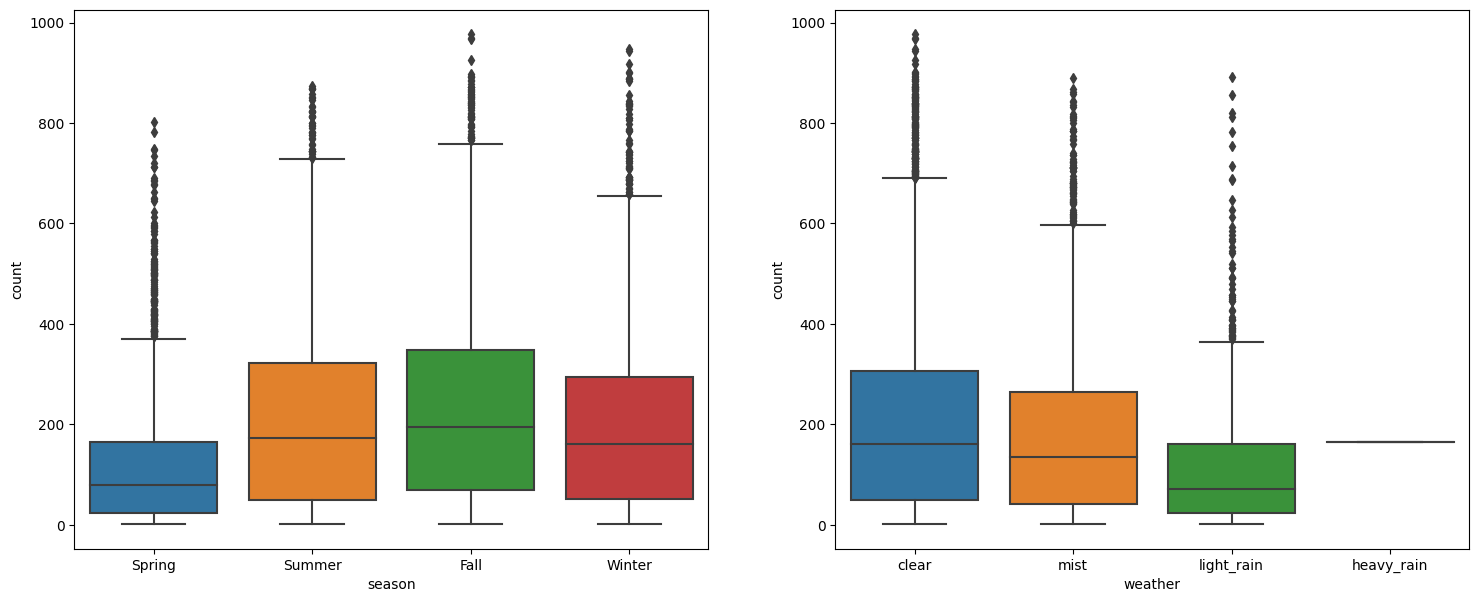

In [ ]:
#Comparing seasons and weather affect on count column

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.boxplot(x='season',y='count', data=df, ax=axes[0])
sns.boxplot(x='weather',y='count', data=df, ax=axes[1])
plt.show()

<Axes: xlabel='season', ylabel='count'>

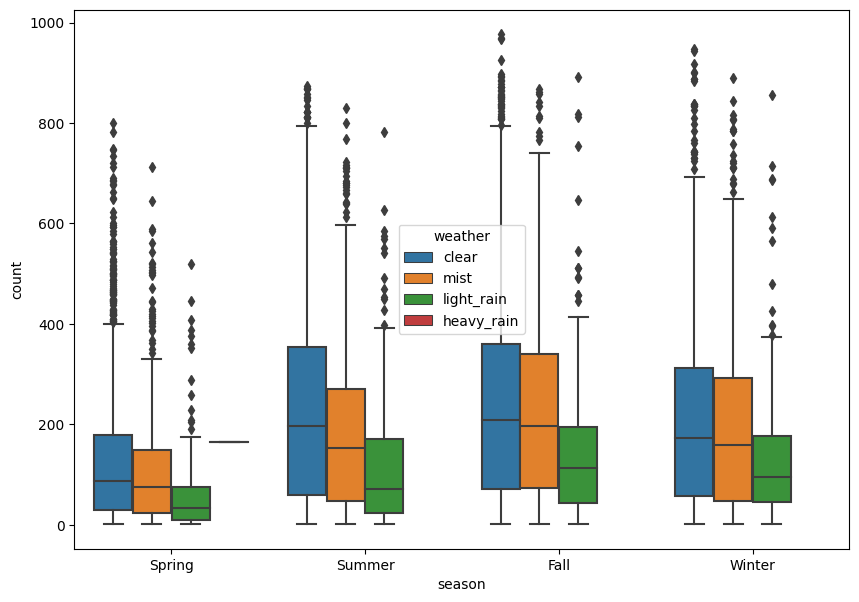

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='season',y='count',hue='weather',data=df)

<Axes: xlabel='Yearly_Quarters', ylabel='count'>

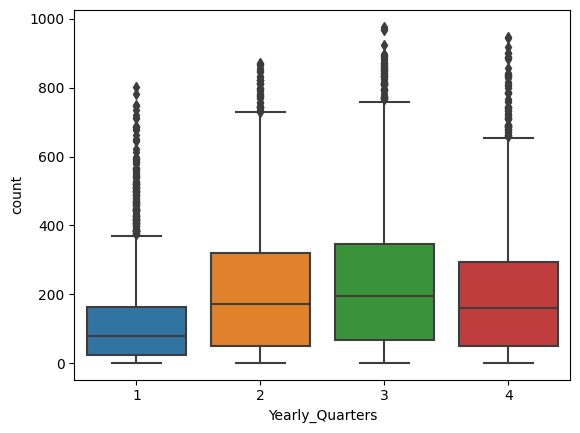

In [ ]:
sns.boxplot(x='Yearly_Quarters',y='count',data=df)

<Axes: xlabel='Yearly_Quarters', ylabel='count'>

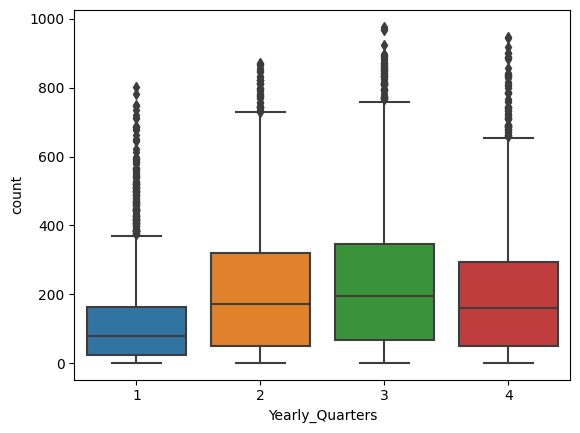

In [ ]:
sns.boxplot(x='Yearly_Quarters',y='count',data=df)

<Axes: xlabel='TimeSlot', ylabel='count'>

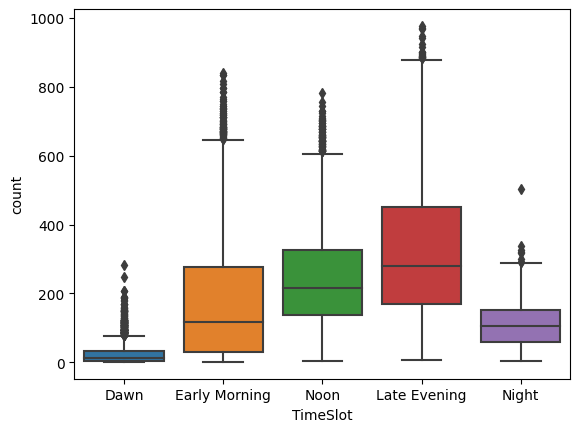

In [ ]:
sns.boxplot(x='TimeSlot',y='count',data=df)

<Axes: xlabel='season', ylabel='count'>

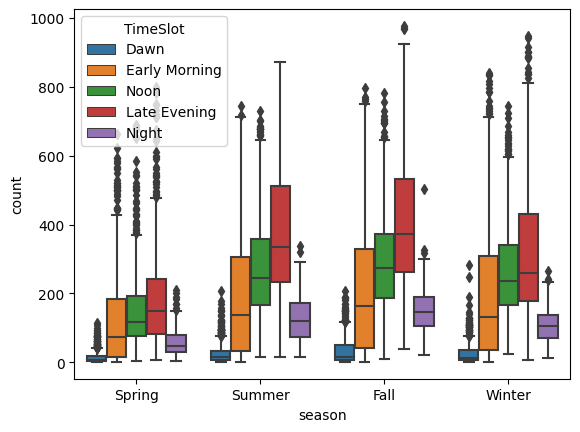

In [ ]:
sns.boxplot(x='seasom',y='count',hue= 'season',data=df)

# **Checking by hypothesis analysis**

In [ ]:
from scipy.stats import ttest_ind , f_oneway,chi2_contingency , shapiro ,levene,kruskal, pearsonr, spearmanr

# **T test analysis**

For checking if working day has effect on no of rented cycles


H0= working day doesnot affect count of rented cycles
Ha= working day has affect count of rented cycles


taking alpla= 0.05

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date_hour,TimeSlot,Yearly_Quarters,month,year
0,2011-01-01 00:00:00,Spring,No,No,clear,9.84,14.395,81,0.0,3,13,16,0,Dawn,1,1,2011
1,2011-01-01 01:00:00,Spring,No,No,clear,9.02,13.635,80,0.0,8,32,40,1,Dawn,1,1,2011


In [ ]:
a = df[df['workingday']=='No']['count']
b = df[df['workingday']=='Yes']['count']

In [ ]:
t_ind_Pval=ttest_ind(a,b,)[1]
t_ind_Pval

0.22644804226361348

since P_value > alpha, we Fail to reject the null hypothesis, hence we dont have sufficient evidence that working day has effect on no of rented cycles

# **Anova analysis**

Checking for Mandatory Parameters to be true

1) checking if the Data For count column has a gaussian Distribution

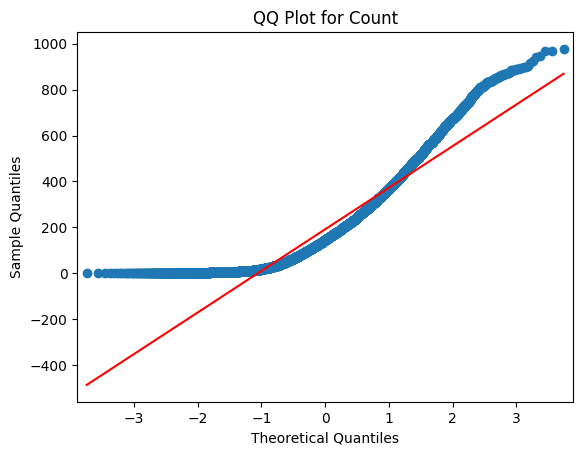

In [ ]:
# Performing Q-Q test for count column

import statsmodels.api as sm

sm.qqplot(df['count'], line='s')
plt.title('QQ Plot for Count')
plt.show()

In [ ]:
# To confirm if the data is not Gaussian distributed we perform Shapiro wilk test

In [ ]:
count_subset = df['count'].sample(100)

In [ ]:
test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
    print("data is not gaussian")
else:
    print("data is gaussian")

1.9355904896656284e-06
data is not gaussian


In [ ]:
#Since the data is not Normally distributed we cannot perform Annova analysis

# hence we go for Kruskal method for further analysis



Checking if season has effect on no of rented cycles



H0= Seasons doesnot affect count of rented cycles

Ha= Seasonshas affect count of rented cycles


taking alpla= 0.05

In [ ]:
a=df[df['season']=='Spring']['count']
b=df[df['season']=='Summer']['count']
c=df[df['season']=='Fall']['count']
d=df[df['season']=='Winter']['count']

In [ ]:
Pval=kruskal(a,b,c,d)[1]
Pval

2.479008372608633e-151

since P_value < alpha, we Accept the alternate hypothesis, hence we can firmly say that Seasons do affect the Rented cycles count

Checking if Weather has effect on no of rented cycles

H0= Weather doesnot affect count of rented cycles

Ha= Weather has affect count of rented cycles

taking alpla= 0.05

In [ ]:
a=df[df['weather']=='clear']['count']
b=df[df['weather']=='mist']['count']
c=df[df['weather']=='light_rain']['count']
d=df[df['weather']=='heavy_rain']['count']

In [ ]:
Pval=kruskal(a,b,c,d)[1]
Pval

3.501611300708679e-44

since P_value < alpha, we Accept the alternate hypothesis, hence we can firmly say that weather do affect the Rented cycles count

Checking if Time has effect on no of rented cycles

H0= TimeSlot doesnot affect count of rented cycles

Ha= TimeSlot has affect count of rented cycles

taking alpla= 0.05

In [ ]:
a=df[df['TimeSlot']=='Dawn']['count']
b=df[df['TimeSlot']=='Early Morning']['count']
c=df[df['TimeSlot']=='Noon']['count']
d=df[df['TimeSlot']=='Late Evening']['count']
e=df[df['TimeSlot']=='Night']['count']

In [ ]:
Pval=kruskal(a,b,c,d)[1]
Pval

0.0

since P_value < alpha, we Accept the alternate hypothesis, hence we can firmly say that Timeslots do affect the Rented cycles count

# **Chi Squared Analysis**

to check if weather is dependant on seasons
H0= Seasons and weather are independant
Ha= Weather is dependant on season
taking alpha=0.05

In [ ]:
dc=pd.crosstab(df['weather'],df['season'])
dc

season,Fall,Spring,Summer,Winter
weather,,,,
clear,1930,1759,1801,1702
heavy_rain,0,1,0,0
light_rain,199,211,224,225
mist,604,715,708,807


In [ ]:
chi2_stat, p_val, dof, expected = chi2_contingency(dc)
p_val

1.5499250736864862e-07


since P_value < alpha, we Accept the alternate hypothesis, hence we can firmly say that Weather is dependant on season

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date_hour,TimeSlot,Yearly_Quarters,month,year
0,2011-01-01 00:00:00,Spring,No,No,clear,9.84,14.395,81,0.0000,3,13,16,0,Dawn,1,1,2011
1,2011-01-01 01:00:00,Spring,No,No,clear,9.02,13.635,80,0.0000,8,32,40,1,Dawn,1,1,2011
2,2011-01-01 02:00:00,Spring,No,No,clear,9.02,13.635,80,0.0000,5,27,32,2,Dawn,1,1,2011
3,2011-01-01 03:00:00,Spring,No,No,clear,9.84,14.395,75,0.0000,3,10,13,3,Dawn,1,1,2011
4,2011-01-01 04:00:00,Spring,No,No,clear,9.84,14.395,75,0.0000,0,1,1,4,Dawn,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,clear,15.58,19.695,50,26.0027,7,329,336,19,Late Evening,4,12,2012
10882,2012-12-19 20:00:00,Winter,No,Yes,clear,14.76,17.425,57,15.0013,10,231,241,20,Late Evening,4,12,2012
10883,2012-12-19 21:00:00,Winter,No,Yes,clear,13.94,15.910,61,15.0013,4,164,168,21,Late Evening,4,12,2012
10884,2012-12-19 22:00:00,Winter,No,Yes,clear,13.94,17.425,61,6.0032,12,117,129,22,Night,4,12,2012


In [ ]:
df[["casual", "count",]].corr(method="spearman")

,casual,count
casual,1.000000,0.847378
count,0.847378,1.000000


In [ ]:
df[["registered","count"]].corr(method="spearman")

,registered,count
registered,1.000000,0.988901
count,0.988901,1.000000


In [ ]:
df[["atemp","humidity"]].corr(method="spearman")

,atemp,humidity
atemp,1.000000,-0.042028
humidity,-0.042028,1.000000
